# *************************************
# Name - Abhishek Kumar 
# Batch Number - DS2309
# *************************************

# ==================================================
# Project Name - Student Grade Prediction
# ==================================================

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades


Columns Description -  total 43 columns
Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the candidate took exam.

# Predict 
CGPA of a student based on different grades in four years.

# Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ASHISH\Downloads\Grades.csv")

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.shape

(571, 43)

# Checking Null Values

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

<Axes: >

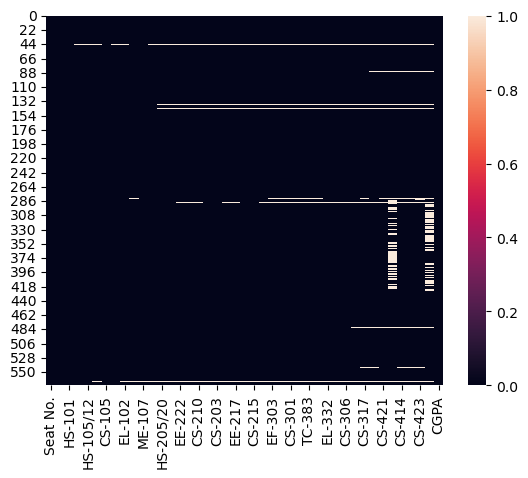

In [7]:
sns.heatmap(df.isnull())

In [8]:
#checking null value through row
row_null=df.isnull().sum(axis=1)
row_null

0      0
1      0
2      0
3      0
4      0
      ..
566    0
567    0
568    0
569    0
570    0
Length: 571, dtype: int64

In [9]:
null_rows=df[df.isnull().any(axis=1)]
null_counts = null_rows.isnull().sum(axis=1)
null_counts

44     36
60     24
86      7
91     19
137    30
       ..
423     1
424     1
481     9
543     5
565    35
Length: 154, dtype: int64

In [10]:
rows_to_drop = row_null[row_null > 33].index
df.drop(rows_to_drop, inplace=True)

In [11]:
 ##separate features and labels
X=df.drop('CGPA',axis=1)
y=df['CGPA']

### Filling Null Values

In [12]:
def fillna_with_modes(row):
    modes = row.mode()
    if len(modes) > 0:
        return row.fillna(modes[0])
    else:
        return row

df=df.apply(fillna_with_modes, axis=1)
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [14]:
df[df.isnull().any(axis=1)]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


# Exploratory Data Analysis

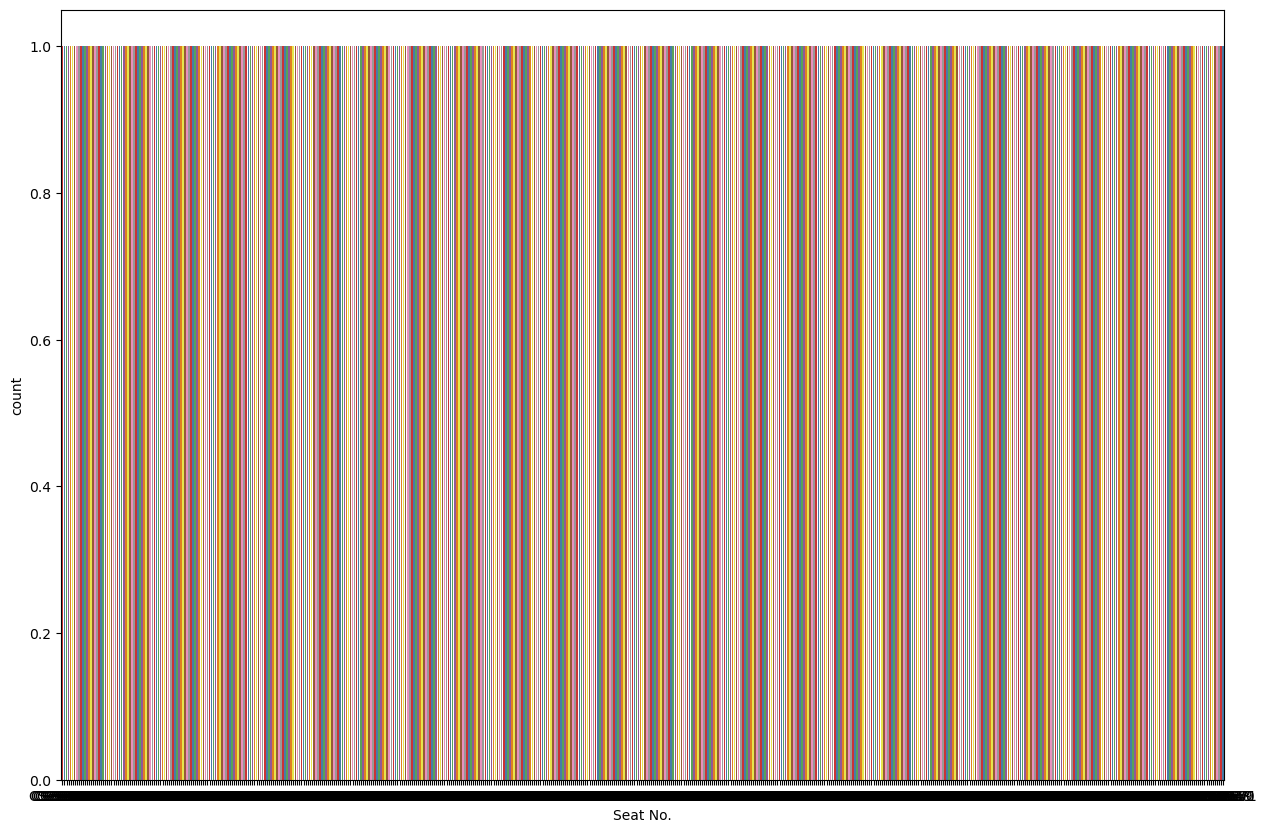

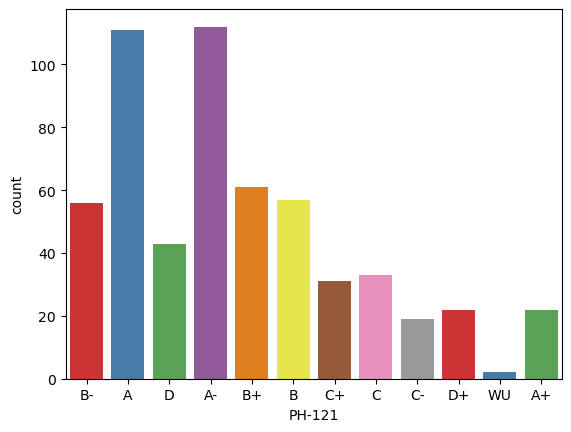

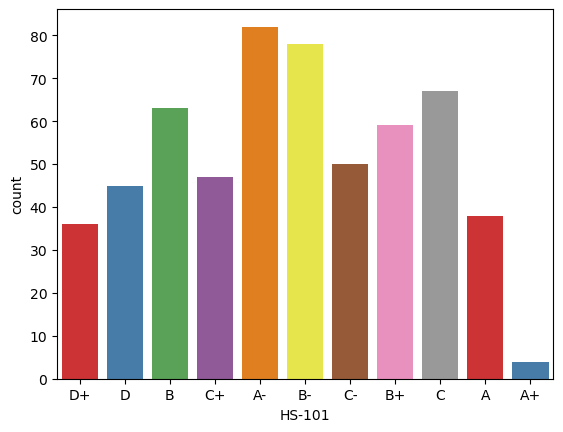

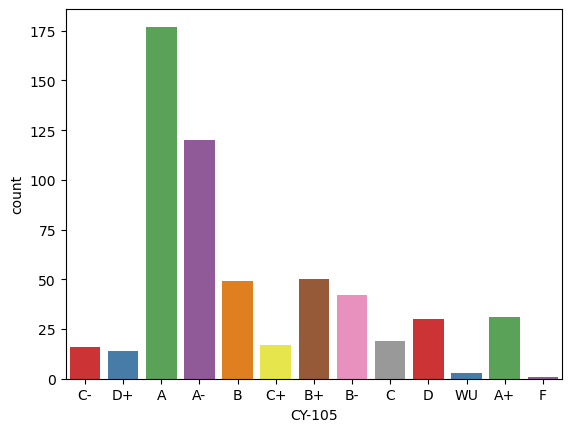

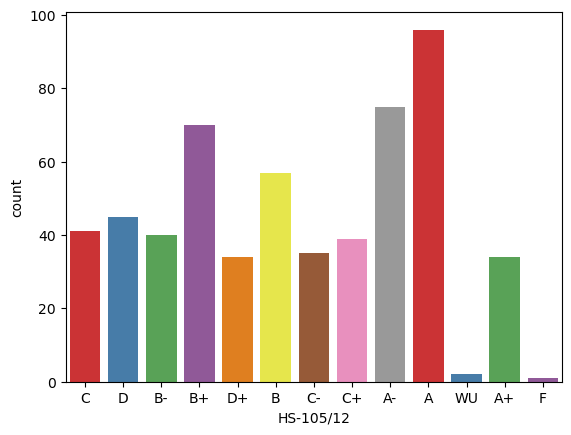

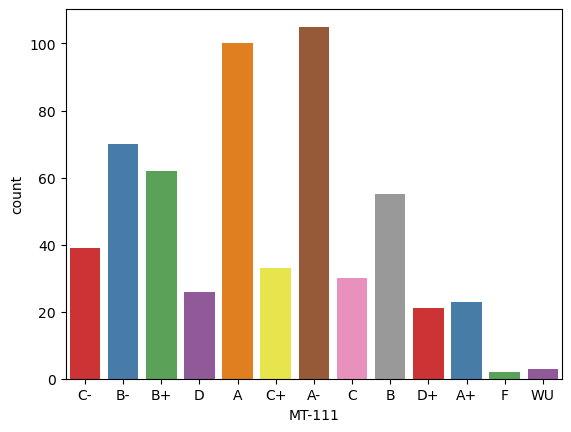

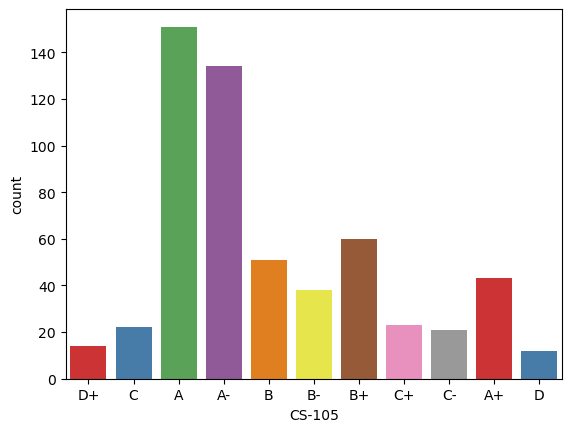

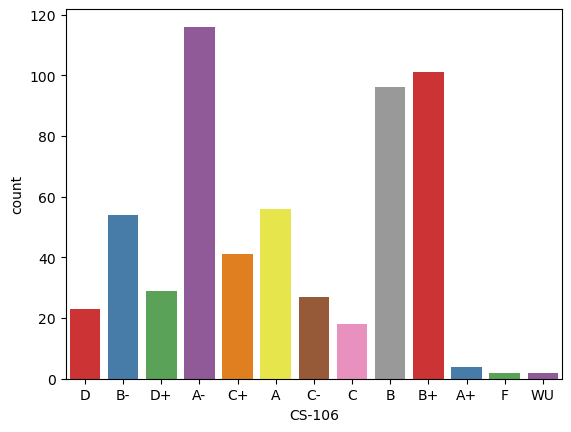

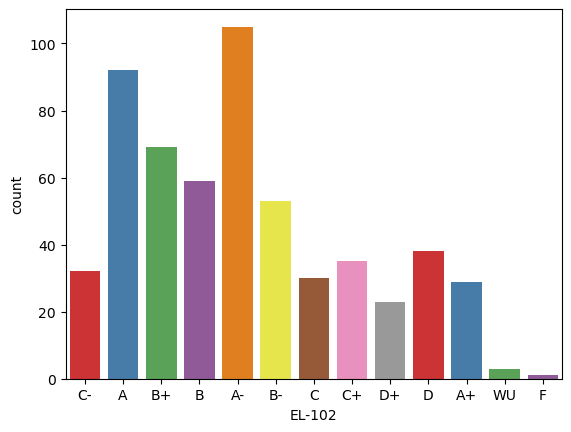

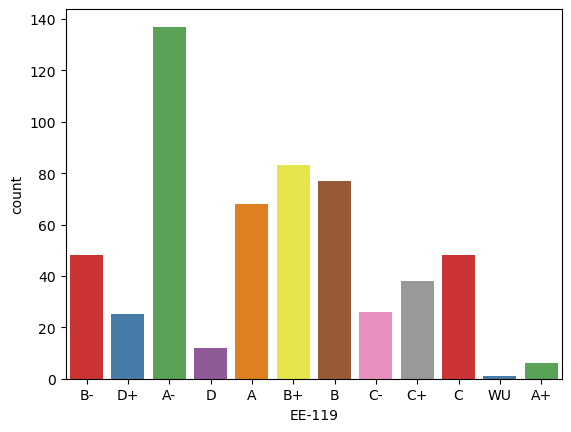

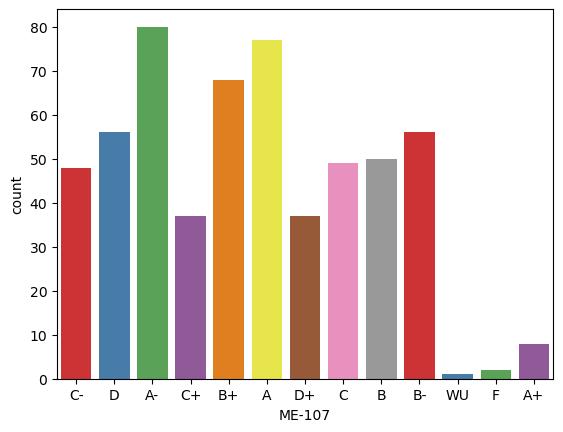

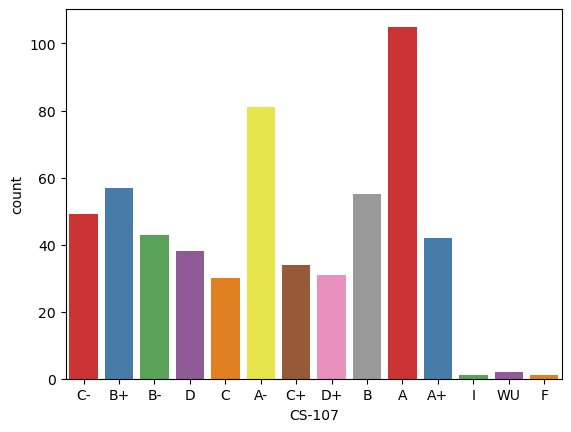

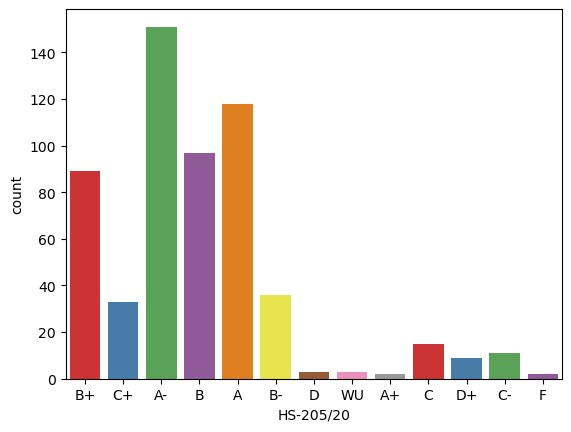

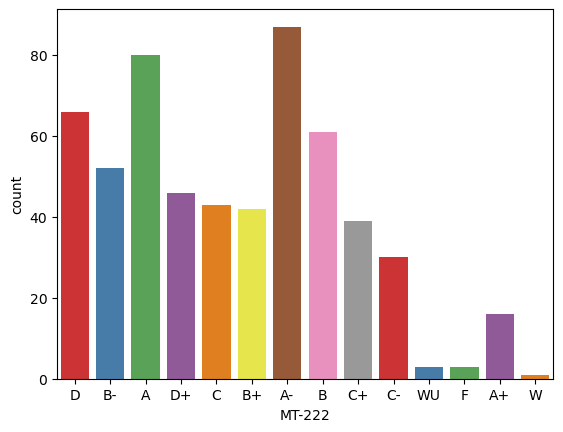

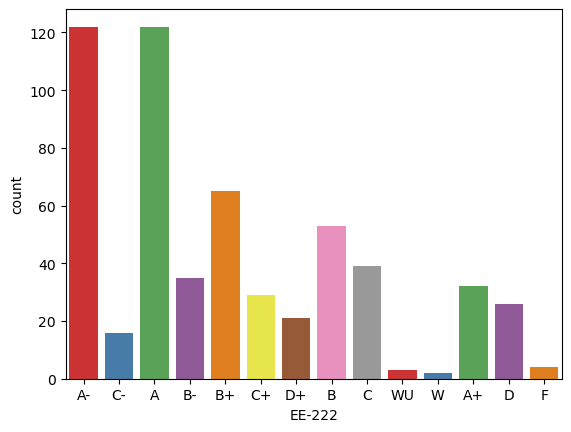

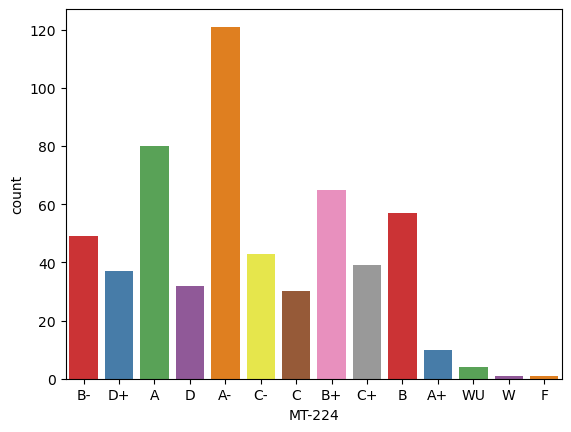

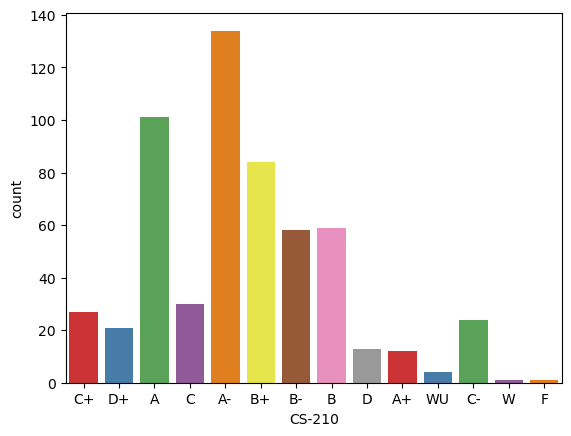

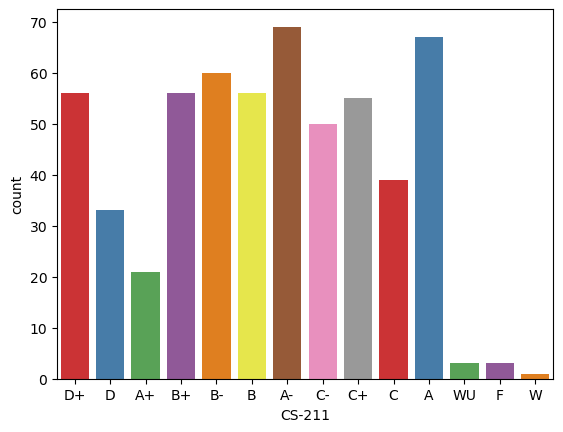

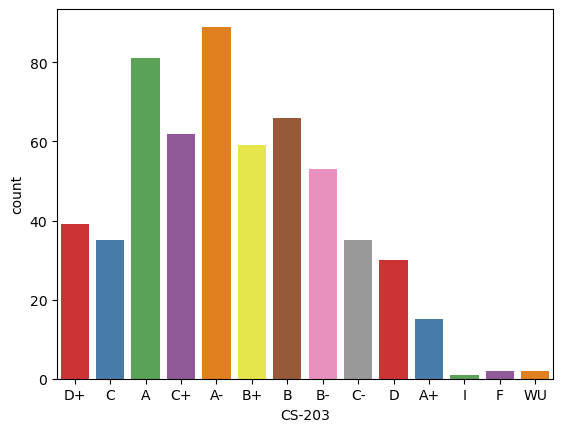

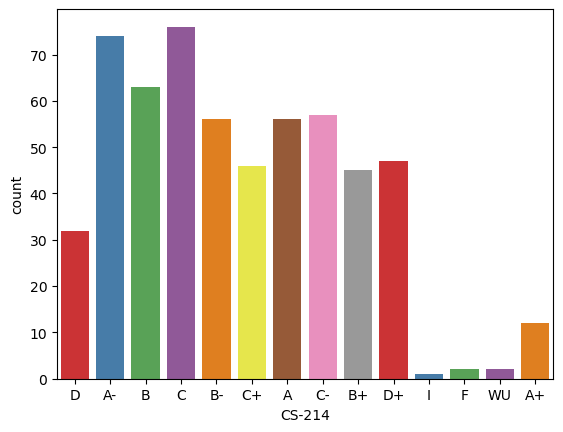

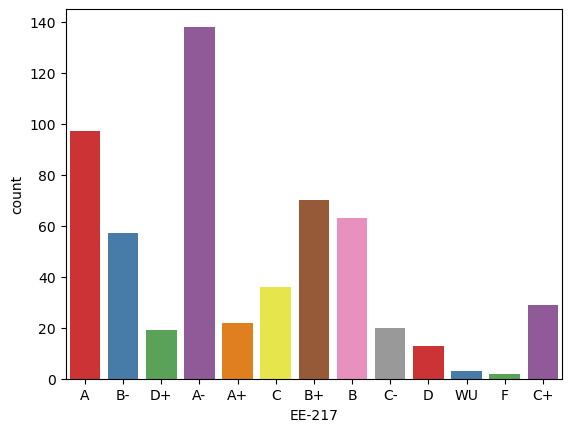

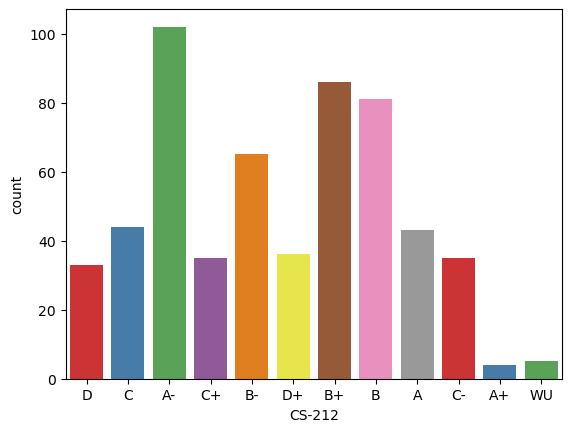

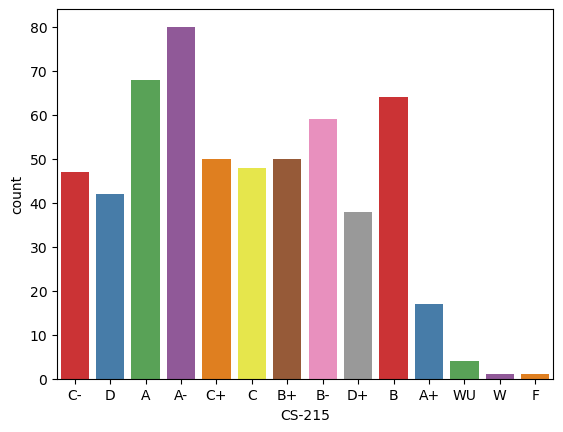

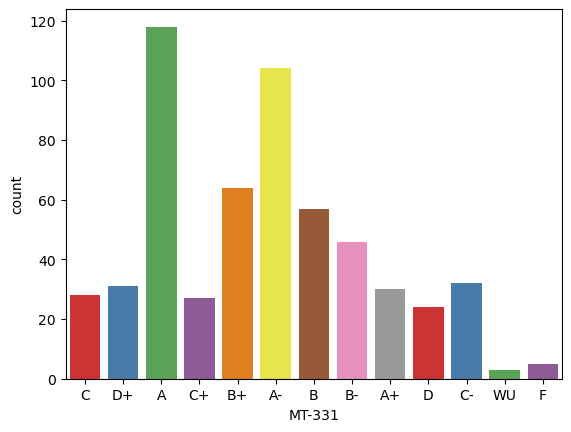

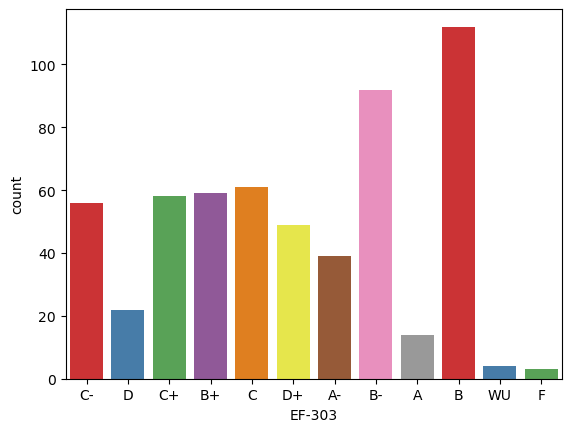

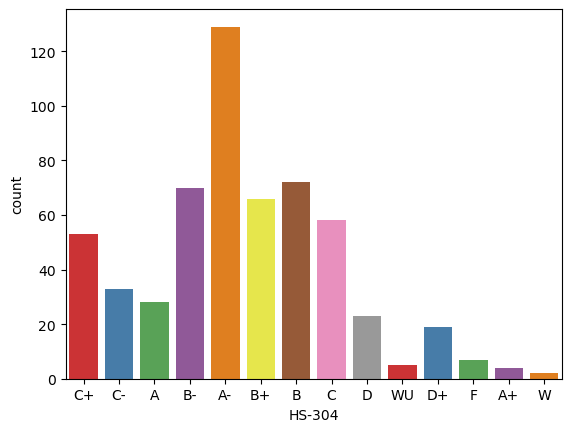

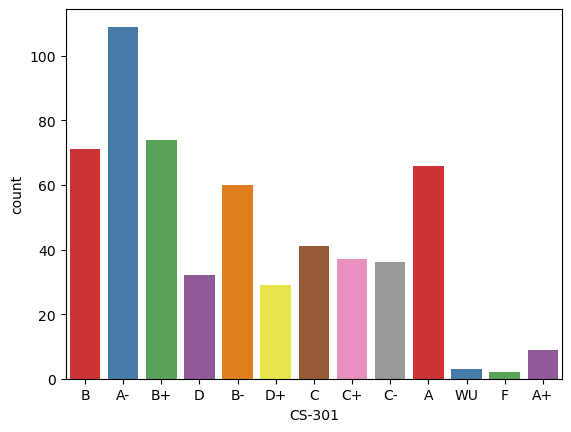

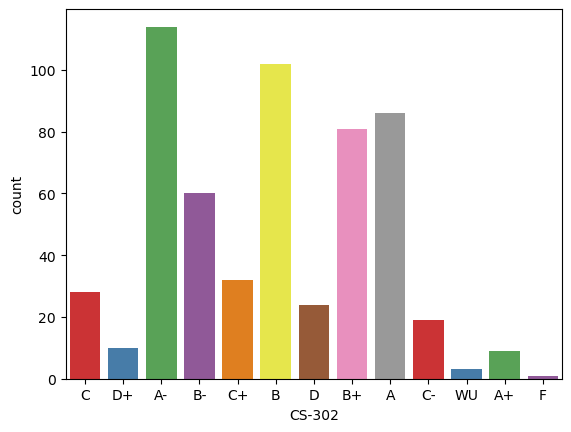

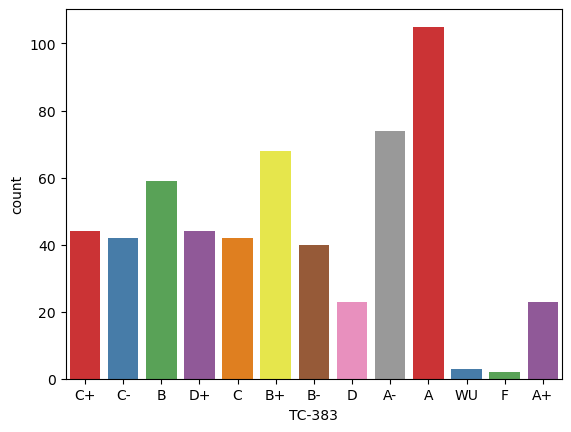

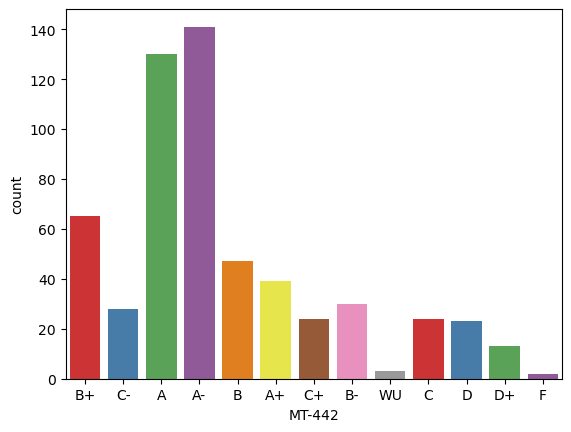

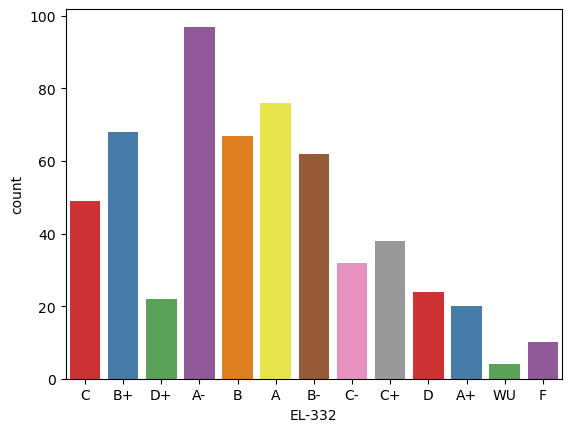

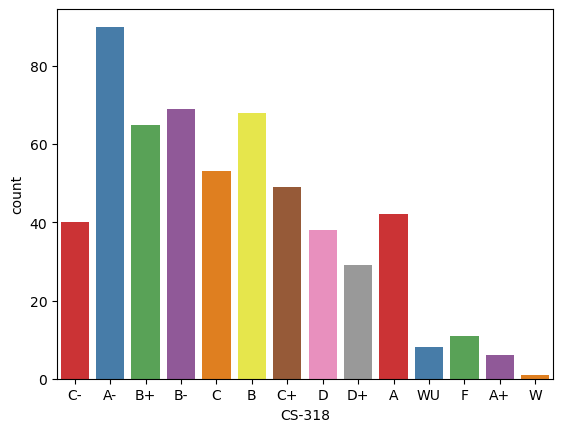

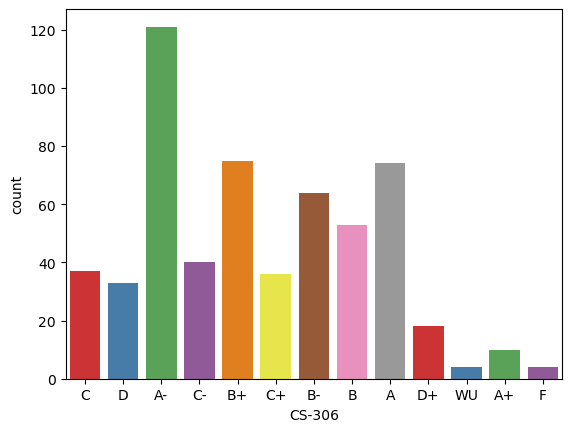

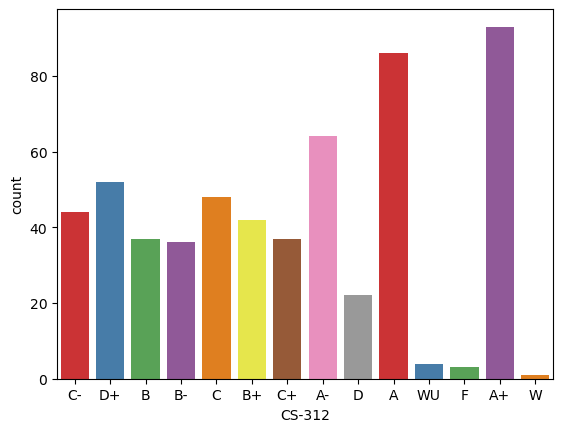

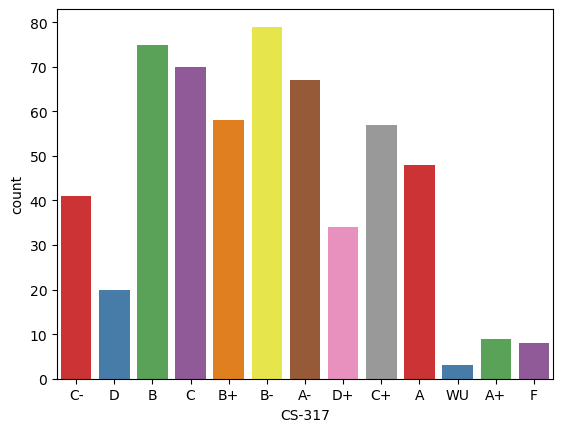

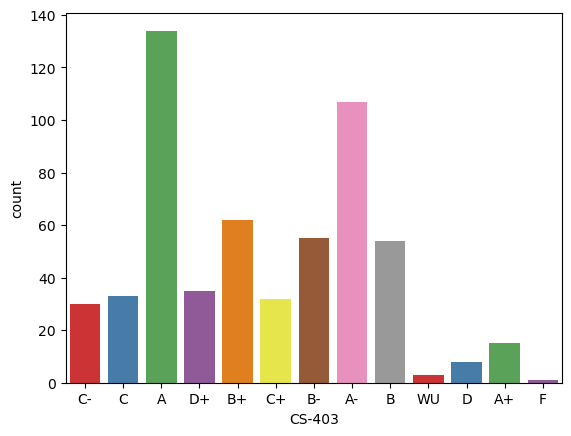

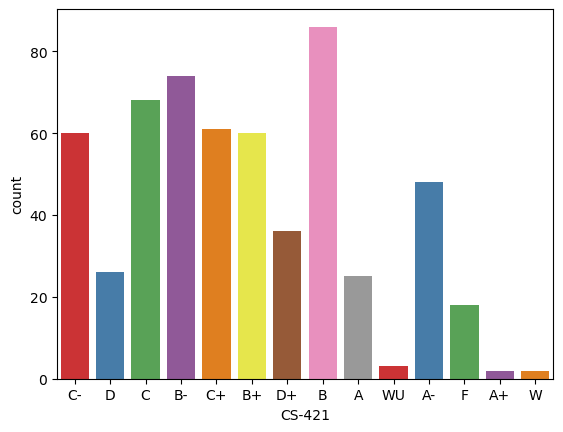

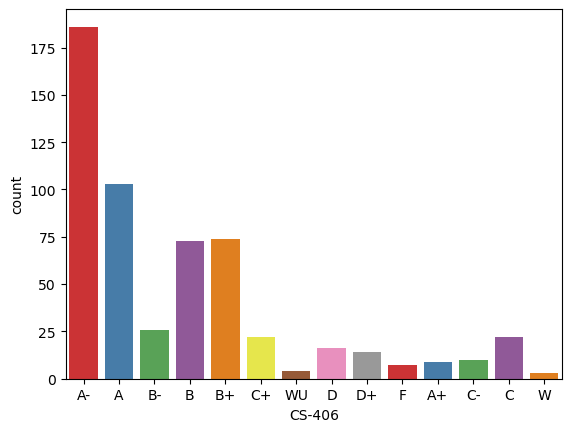

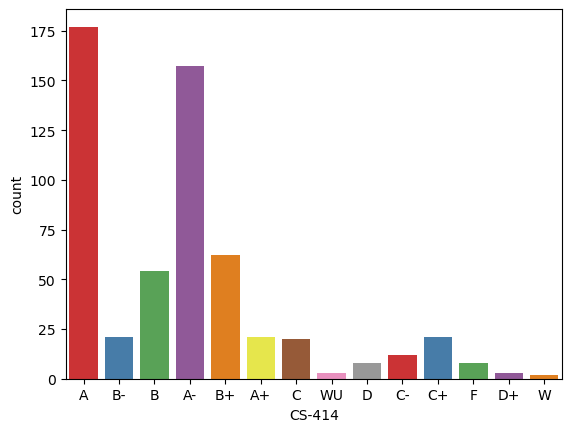

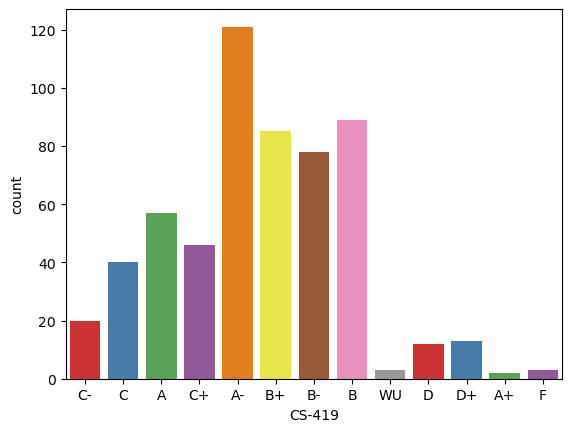

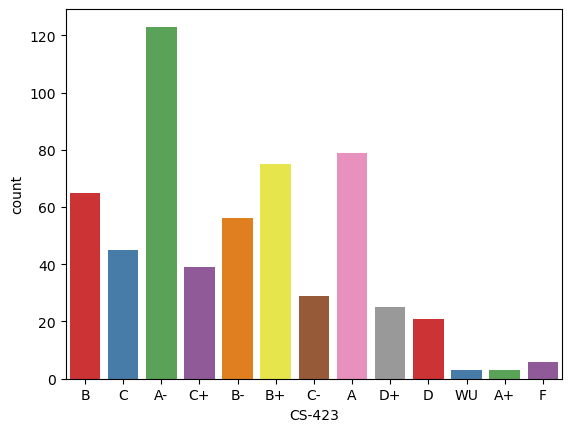

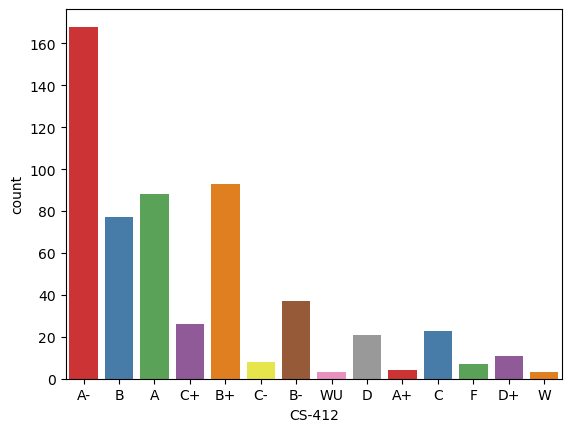

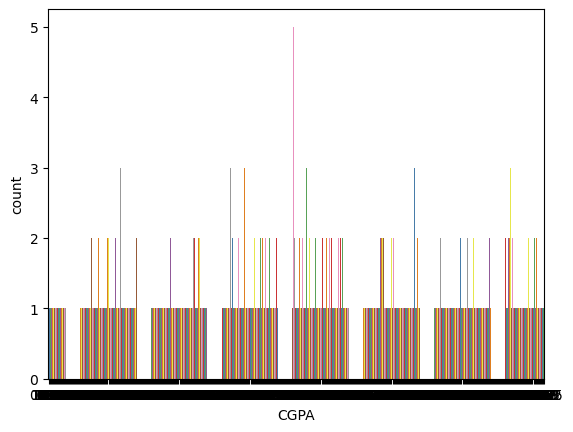

In [15]:
plt.figure(figsize=(15,10))
for col in df.columns:

        sns.countplot(x=df[col],data=df, palette = "Set1")
        plt.show()

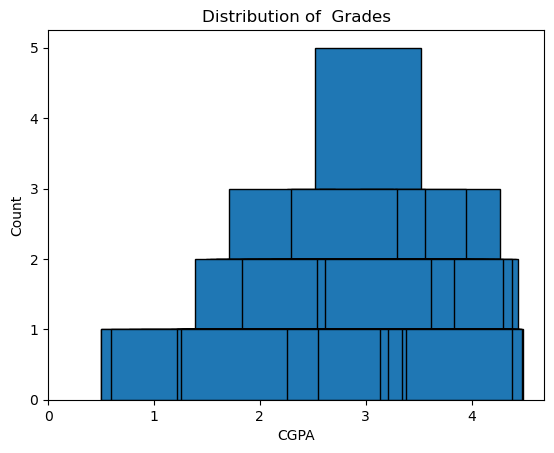

In [16]:
plt.bar(df['CGPA'].value_counts().index, 
        df['CGPA'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('CGPA'); plt.ylabel('Count'); plt.title('Distribution of  Grades');
plt.xticks(list(range(0, 5)));

## Grouping columns By subjects

In [17]:
grouped_columns = df.columns.str.split('-', expand=True).get_level_values(0)
grouped_columns

Index(['Seat No.', 'PH', 'HS', 'CY', 'HS', 'MT', 'CS', 'CS', 'EL', 'EE', 'ME',
       'CS', 'HS', 'MT', 'EE', 'MT', 'CS', 'CS', 'CS', 'CS', 'EE', 'CS', 'CS',
       'MT', 'EF', 'HS', 'CS', 'CS', 'TC', 'MT', 'EL', 'CS', 'CS', 'CS', 'CS',
       'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CGPA'],
      dtype='object')

In [18]:
grouped_columns.unique()

Index(['Seat No.', 'PH', 'HS', 'CY', 'MT', 'CS', 'EL', 'EE', 'ME', 'EF', 'TC',
       'CGPA'],
      dtype='object')

In [19]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [20]:
for i in df.columns:    
    print(i)
    print('Number of unique data:',df[i].nunique())
    print("Value Counts")
    print(df[i].value_counts())
    print("")
    print("==================================================================================================")
    print("")

Seat No.
Number of unique data: 569
Value Counts
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97186    1
CS-97185    1
CS-97184    1
CS-97183    1
CS-97571    1
Name: Seat No., Length: 569, dtype: int64


PH-121
Number of unique data: 12
Value Counts
A-    112
A     111
B+     61
B      57
B-     56
D      43
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
Name: PH-121, dtype: int64


HS-101
Number of unique data: 11
Value Counts
A-    82
B-    78
C     67
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
Name: HS-101, dtype: int64


CY-105
Number of unique data: 13
Value Counts
A     177
A-    120
B+     50
B      49
B-     42
A+     31
D      30
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


HS-105/12
Number of unique data: 13
Value Counts
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    35
D+    34
A+    34
WU     2
F      1
Name: HS-105/

### Observation
 Here we can observe that features and labels are related.

In [27]:
X.drop('Seat No.',axis=1, inplace=True)

Seat No. doesn't impact on data set,
And it's not relevant for analysis.

# Model Training 

## _Label Encoding 

In [29]:
from sklearn.preprocessing import LabelEncoder
for col in X.columns:
    label = LabelEncoder()
    X[col] = label.fit_transform(X[col])

In [30]:
X.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
X_train

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
162,0,5,0,1,3,1,2,2,0,2,...,0,4,0,2,5,2,0,2,5,2
23,0,2,0,2,0,0,5,2,4,0,...,2,5,5,2,5,4,0,2,2,2
143,9,9,12,12,12,9,12,12,9,12,...,13,14,12,11,13,14,13,12,12,13
239,0,4,0,1,2,1,2,0,2,0,...,2,3,2,3,5,2,0,3,4,0
406,5,5,4,3,4,4,4,0,5,4,...,7,1,5,2,3,14,0,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
133,5,8,8,9,8,2,7,10,10,7,...,7,6,6,6,6,2,2,7,6,4
260,0,2,0,1,0,1,0,2,2,3,...,0,2,0,1,2,2,0,2,0,0
434,2,8,4,0,3,5,2,6,2,8,...,5,2,4,0,6,3,4,2,2,5


In [33]:
y_train

162    3.571
23     3.586
143    1.000
239    3.573
406    3.229
       ...  
0      2.205
133    2.379
260    3.751
434    3.014
515    2.776
Name: CGPA, Length: 455, dtype: float64

In [35]:
X_test

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
145,1,0,1,1,0,1,0,0,3,0,...,1,2,0,0,2,2,0,0,0,2
51,8,3,5,5,3,4,9,5,4,9,...,7,10,5,7,8,2,2,4,3,2
491,4,10,0,5,4,3,4,2,2,6,...,7,4,5,0,6,7,3,3,6,3
62,3,8,3,10,5,7,7,6,2,8,...,5,5,8,6,7,2,2,5,5,2
107,2,2,0,0,1,0,0,0,0,2,...,0,0,0,0,4,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5,5,6,5,7,7,10,7,2,6,...,5,8,3,5,6,2,0,5,4,0
508,2,9,0,4,4,0,3,3,4,4,...,5,4,4,4,4,3,3,2,4,3
519,2,5,2,4,0,4,2,6,4,3,...,3,5,7,0,5,3,5,3,8,7
510,4,8,0,3,0,3,4,9,4,4,...,4,0,4,0,4,3,7,2,7,4


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [40]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y1=reg.predict(X_test)
r1=r2_score(y_test,y1)
print('R2 score is :',r1)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y1))
print('Mean Squared Error is :',mean_squared_error(y_test,y1))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y1)))

R2 score is : 0.9448765541340862
Mean Absolute Error is : 0.10766757907089039
Mean Squared Error is : 0.02664410264868674
Root Mean Squared Error is : 0.16323021365141546


In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y2=knn.predict(X_test)
r2=r2_score(y_test,y2)

print('R2 score is :',r2)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y2))
print('Mean Squared Error is :',mean_squared_error(y_test,y2))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y2)))

R2 score is : 0.9306473168233534
Mean Absolute Error is : 0.11373508771929824
Mean Squared Error is : 0.033521852280701744
Root Mean Squared Error is : 0.18308973832714312


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
y3=tree.predict(X_test)
r3=r2_score(y_test,y3)

print('R2 score is :',r3)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y3))
print('Mean Squared Error is :',mean_squared_error(y_test,y3))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y3)))

R2 score is : 0.863721961758181
Mean Absolute Error is : 0.18848245614035083
Mean Squared Error is : 0.06587044736842106
Root Mean Squared Error is : 0.25665238625117254


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y4=rfr.predict(X_test)
r4=r2_score(y_test,y4)

print('R2 score is :',r4)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y4))
print('Mean Squared Error is :',mean_squared_error(y_test,y4))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y4)))

R2 score is : 0.9447483647398677
Mean Absolute Error is : 0.11742684210526302
Mean Squared Error is : 0.026706063422807024
Root Mean Squared Error is : 0.16341989910291532


In [53]:
from sklearn.svm import SVR

In [57]:
svr=SVR()
svr.fit(X_train,y_train)
y5=svr.predict(X_test)
r5=r2_score(y_test,y5)

print('R2 score is :',r5)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y5))
print('Mean Squared Error is :',mean_squared_error(y_test,y5))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y5)))

R2 score is : 0.937272868885475
Mean Absolute Error is : 0.10027395867468211
Mean Squared Error is : 0.03031936944469045
Root Mean Squared Error is : 0.1741245802426827


In [59]:
Result=pd.DataFrame({"Models": ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor' ,'SVR'],
                          "r2 value":[r1,r2,r3,r4,r5]})
                     
Result

,Models,r2 value
0,LinearRegression,0.944877
1,KNeighborsRegressor,0.930647
2,DecisionTreeRegressor,0.863722
3,RandomForestRegressor,0.944748
4,SVR,0.937273


# ==================THANKS=====================